# Exercise: Implementing Motion Detection Using Background Subtraction

### Objective

In this exercise, you will implement motion detection in a video using background subtraction. Follow the steps outlined below and write the corresponding code for each step.

### Step 1: Import Required Libraries

In [1]:
import numpy as np
import cv2


### Step 2: Set Up Video Capture

Initialize the video capture object by loading the video file (e.g., `video.mp4`). This object will allow you to read frames from the video.

In [2]:
cap = cv2.VideoCapture('/content/Motion_Detection_Test.mp4')


### Step 3: Define the Video Writer

Set up a `VideoWriter` object to save the processed video with motion detection. Choose the appropriate codec (e.g., `'mp4v'`) and specify the frame rate and resolution for the output video.

In [3]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('motion_output.mp4', fourcc, 20.0, (600, 500))


### Step 4: Create the Background Subtractor

Use OpenCV's MOG2 background subtractor to create a background model that will help detect moving objects. Set `detectShadows=True` to improve detection accuracy by accounting for shadows.

In [4]:

# Create a background subtractor using MOG2
fgbg = cv2.createBackgroundSubtractorMOG2(detectShadows=True)

### Step 5: Process the Video Frame by Frame

1. In a loop, capture each frame from the video.
2. Resize the frame for consistency.
3. Apply the background subtractor to detect moving objects in the frame.
4. Create a binary thresholded image to isolate the moving objects.
5. Apply morphological operations like erosion and dilation to reduce noise and strengthen the detected areas.
6. Detect contours (boundaries) of the moving objects.
7. For each contour, calculate its area and filter out small movements by considering only contours with areas greater than a certain threshold (e.g., 1200).
8. Draw rectangles around the detected moving objects and annotate the motion.

In [8]:
while True:
    # Capture each frame of the video
    success, img = cap.read()
    print(success)
    # Check if the frame is captured successfully
    if success:
        # Resize the frame for consistency
        img = cv2.resize(img, (600, 500))
        # Apply the background subtractor to detect moving objects
        fgmask = fgbg.apply(img)
        # Create a binary thresholded image for better motion detection
        _, thresh = cv2.threshold(fgmask.copy(), 180, 255, cv2.THRESH_BINARY)
        # Define a kernel for morphological operations
        kernel = np.ones((7, 7), np.uint8)
        # Apply erosion to remove noise from the thresholded image
        thresh = cv2.erode(thresh, kernel)
        # Apply dilation to strengthen the detected moving objects
        thresh = cv2.dilate(thresh, None, iterations=6)
        # Find contours of the detected motion
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Draw rectangles around detected motion
        for contour in contours:
            # Calculate the area of the contour
            area = cv2.contourArea(contour)

            # Only consider significant motion (area > 1200)
            if area > 1200:
                # Get the bounding box coordinates for the motion
                x, y, w, h = cv2.boundingRect(contour)

                # Draw a rectangle around the detected motion and label it
                cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 3)
                cv2.putText(img, 'MOTION DETECTED', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Write the processed frame with motion detection to the output video
        out.write(img)

    else:
        # Break the loop if no more frames are available
        break

False


### Step 6: Release Resources

After processing all the frames, release the video capture and writer objects to free up system resources. Close any OpenCV windows that were opened during the process.

In [9]:
cap.release()
out.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


### Bonus Challenge

Try experimenting with different threshold values, kernel sizes, or codecs to optimize the motion detection and improve the output video quality.

#output

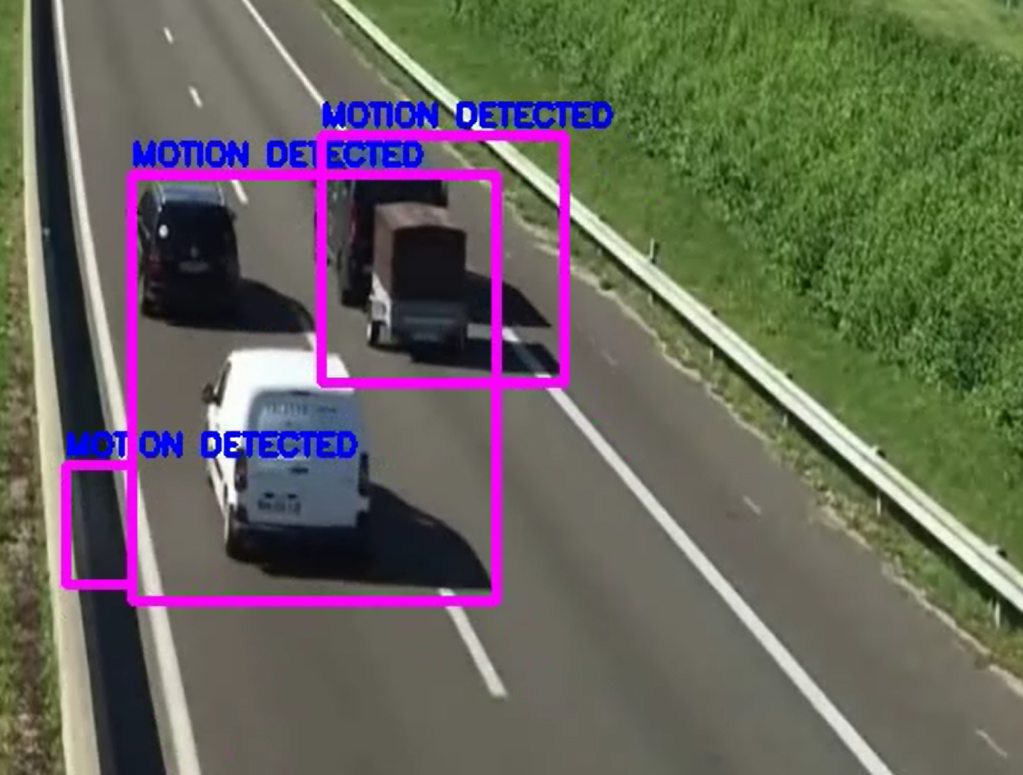